# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 1384 Тапеха Владимир Алексеевич и Лукин Евгений Юрьевич.

## Цель работы
Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

### Дискретное преобразование Фурье (ДПФ)
Амплитуды спектра дискретного периодического сигнала *s(t)* можно получить с помощью ДПФ:
$$
\Phi(n) = \sum\limits_{k=0}^{N-1} s(k)e^{-\frac{2\pi n i}{N}k},\ n\ = \ 0,\ 1,\ 2,\ ...,\ N - 1,
$$
где  n-ая частота $\omega$ равна $\frac{2\pi n}N.$

### Дифференциальный фильтр первого порядка
$$
    y_n = s'_n = \frac{s_{n+1} - s_{n-1}}{2h},\ h = T
$$

### Формула прямоугольников: 
$$ 
    y_{n+1} = y_n + s_{n + \frac{1}{2}}
$$

### Формула трапеций: 
$$
    y_{n+1} = y_n + \frac{1}{2}\left ( s_n + s_{n+1}\right )
$$

### Формула Симпсона: 
$$
    y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} +4s_n + s_{n+1})
$$


## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

### Задание 1
Сформировать дискретный сигнал посредством дискретизации с шагом *T*=1 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega k t + \phi k) $. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом 
$\Delta\omega = 0.1\pi.$ Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета (N=31).

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import random

delta_omega = np.pi * 0.1
n = 11
N = 32
T = 1

In [182]:

w = [delta_omega * i for i in range(n)]
A = np.arange(1, n + 1)
random.shuffle(A)
phi = [random.uniform(0, 0.5) for _ in range(n)]

s = lambda t: sum(A[i] * np.cos(w[i]*t + phi[i]) for i in range(n))
Xn = np.arange(N)
X = [i * N / (4096) for i in range(4096)]
S = [s(t) for t in Xn]
Sa = [s(t) for t in X]

print(f'Гармоники omega = {w}')
print(f'Амплитуды гармоник A = {A}')
print(f'Начальные фазы phi = {phi}')

Гармоники omega = [0.0, 0.3141592653589793, 0.6283185307179586, 0.9424777960769379, 1.2566370614359172, 1.5707963267948966, 1.8849555921538759, 2.199114857512855, 2.5132741228718345, 2.827433388230814, 3.141592653589793]
Амплитуды гармоник A = [ 7  4  8 10  2 11  1  5  6  9  3]
Начальные фазы phi = [0.45365107727209447, 0.22233606420343432, 0.37507424195495526, 0.3074409809239678, 0.2750225385342641, 0.3256802497194246, 0.10698384542448258, 0.02461258654388554, 0.34118052915272057, 0.07670997075867375, 0.06720197931077265]


### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

Построим графики сгенерированного сигнала:

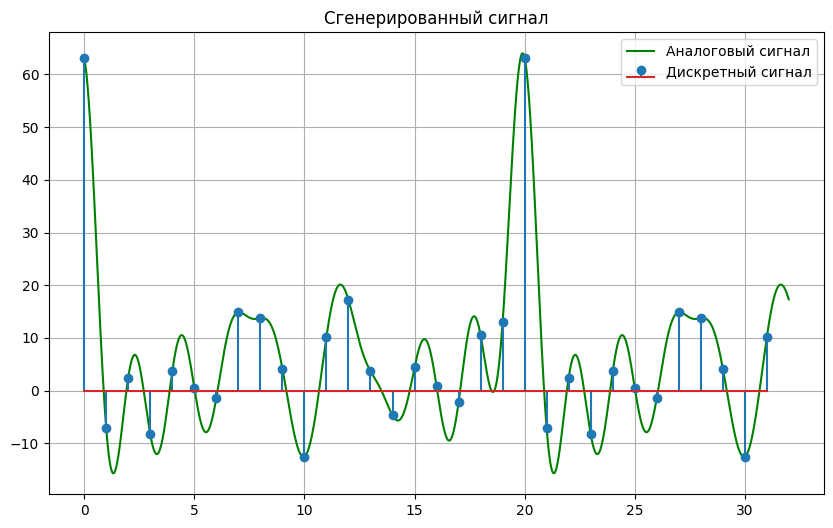

In [183]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(X, Sa, label='Аналоговый сигнал', color='green')
plt.stem(Xn, S, label='Дискретный сигнал')

plt.title("Сгенерированный сигнал")
plt.legend()
plt.grid()
plt.show()


### Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

Найдем дискретные отсчеты спектра дискретного сигнала, для этого применим преобразование Фурье и построим график:

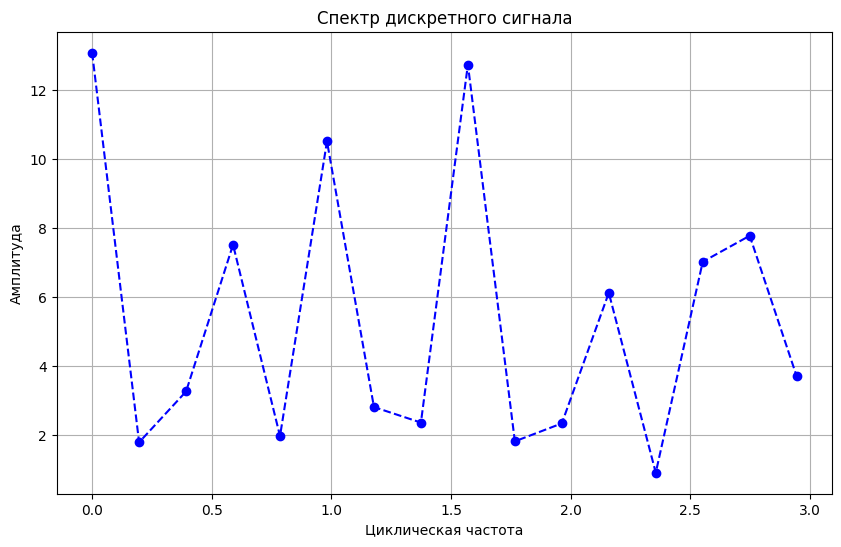

In [184]:
W = 2 * np.pi * np.fft.fftfreq(N, d=T)[: N // 2] 
F = 2 * np.fft.fft(S, norm='forward')[: N // 2]


plt.plot(W, np.abs(F), 'o--', color='blue')
plt.xlabel('Циклическая частота')
plt.ylabel('Амплитуда')
plt.title("Спектр дискретного сигнала")
plt.grid()
plt.show()


### Задания 4 и 5
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

Формулы передаточной функции для линейного сглаживания по 5 точкам:
$$
    H(\omega) = \frac{1}{5}\left (1 + 2\cos\omega + 2\cos 2\omega \right).
$$
Формулы передаточной функции для линейного сглаживания по 9 точкам:
$$
    H(\omega) = \frac{1}{7}\left ( 1 + 2\cos\omega + 2\cos 2\omega + 2\cos 3\omega + 2\cos 4\omega \right).
$$

In [185]:
L5 = lambda S: [0.2 * (S[i - 2] + S[i - 1] + S[i] + S[i + 1] + S[i + 2]) if i >=2 and i < N - 2 else 0 for i in range(N)]
L9 = lambda S: [1/7 * (S[i - 4] + S[i - 3] + S[i - 2] + S[i - 1] + S[i] + S[i + 1] + S[i + 2] + S[i + 3] + S[i + 4]) if i >=4 and i < N - 4 else 0 for i in range(N)]

Построим графики исходного и сглаженного по пяти точкам сигналов:

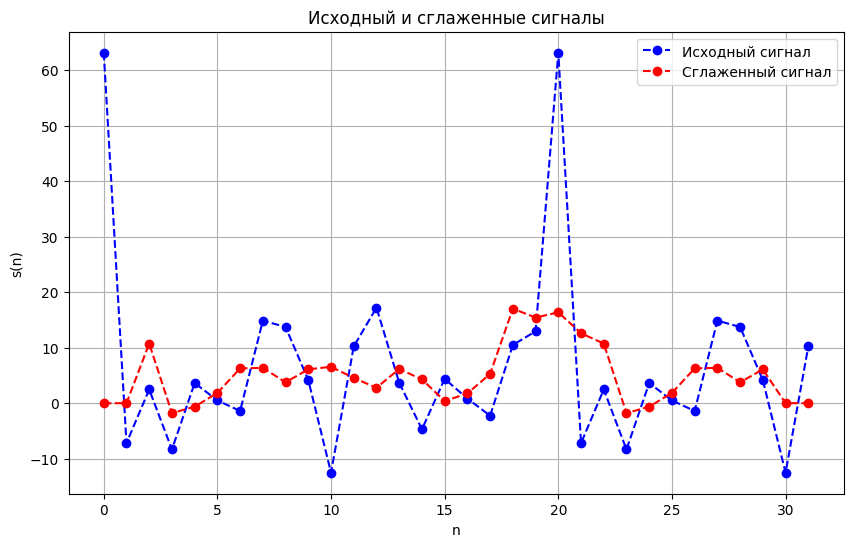

In [186]:
plt.plot(Xn, S, 'o--', color='blue', label='Исходный сигнал')
plt.plot(Xn, L5(S), 'o--', color='red', label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.title("Исходный и сглаженные сигналы")
plt.legend()
plt.grid()
plt.show()

Построим графики исходного и сглаженного по девяти точкам сигналов:

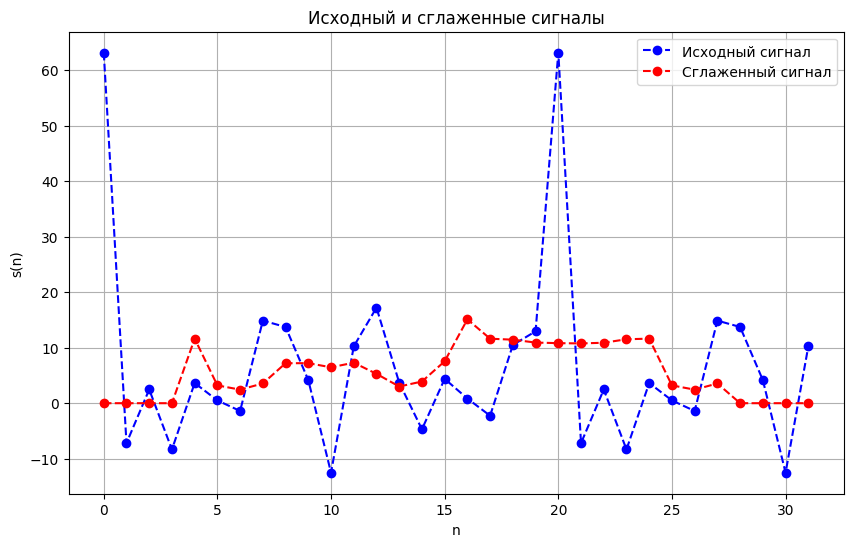

In [187]:
plt.plot(Xn, S, 'o--', color='blue', label='Исходный сигнал')
plt.plot(Xn, L9(S), 'o--', color='red', label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.title("Исходный и сглаженные сигналы")
plt.legend()
plt.grid()
plt.show()

### Задания 6 и 7
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.
Проанализировать результат на соответствие значениям $H(\omega).$ Сделать выводы.

In [188]:
FL5 = np.fft.fft(L5(S), norm='forward')[:N // 2] * 2
FL9 = np.fft.fft(L9(S), norm='forward')[:N // 2] * 2

Построим график дискретных отсчетов спектра дискретретного сигнала после применениия линейного сглаживания по пяти точкам:

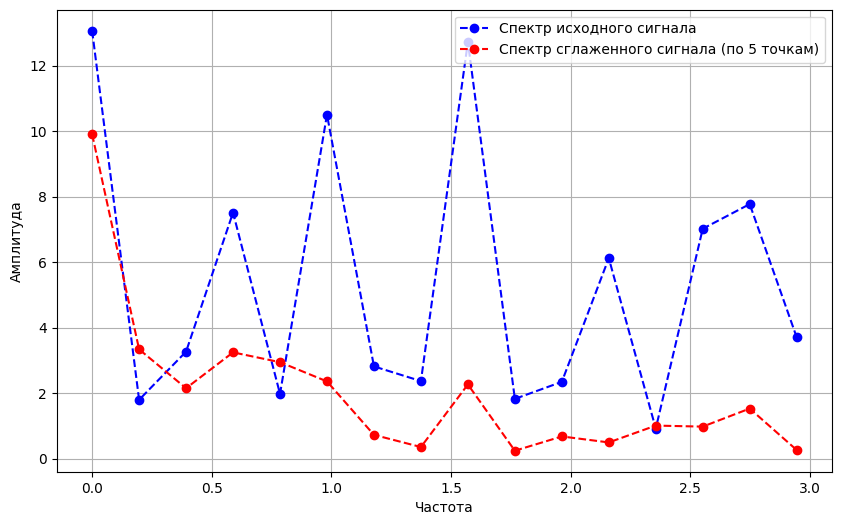

In [189]:
plt.plot(W, [abs(f) for f in F], 'o--', color='blue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in FL5], 'o--', color='red', label='Спектр сглаженного сигнала (по 5 точкам)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

Построим график дискретных отсчетов спектра дискретретного сигнала после применениия линейного сглаживания по девяти точкам:


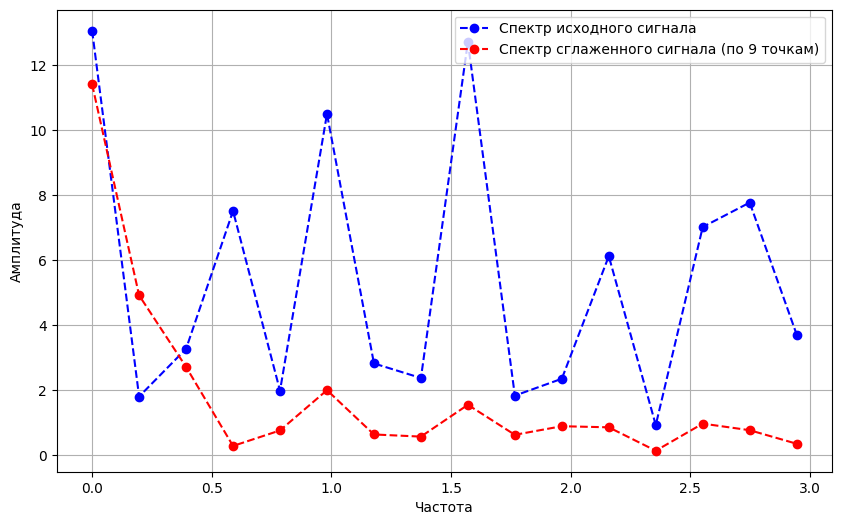

In [190]:
plt.plot(W, [abs(f) for f in F], 'o--', color='blue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in FL9], 'o--', color='red', label='Спектр сглаженного сигнала (по 9 точкам)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

Исходя из графиков, можно заключить, что более высокие частоты сильнее подавляются. Полученный результат соответствует результату, полученным при выполнении предыдущей практической работы.

### Задание 8
Повторить п. 4–7 для следующих фильтров:
1. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
1. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

#### Выполнение задания 8 п.1
Выполним задания 4-7 для дискретного фильтра, соответствующего численному дифференцирования 1-го порядка. Передаточная функция рассматриваемого фильтра задается как:
$$
H(\omega) = \frac{e^{i\omega} - e^{-i\omega}}{2} = i\sin\omega.
$$

Вместе отобразим исходный и сглаженный сигналы:

In [191]:
FD1 = lambda S: [ (S[i + 1] - S[i - 1]) / (2 * T) if i >= 1 and i < N - 1 else 0 for i in range(N)]
FFD1 = np.fft.fft(FD1(S), norm='forward')[:N // 2] * 2

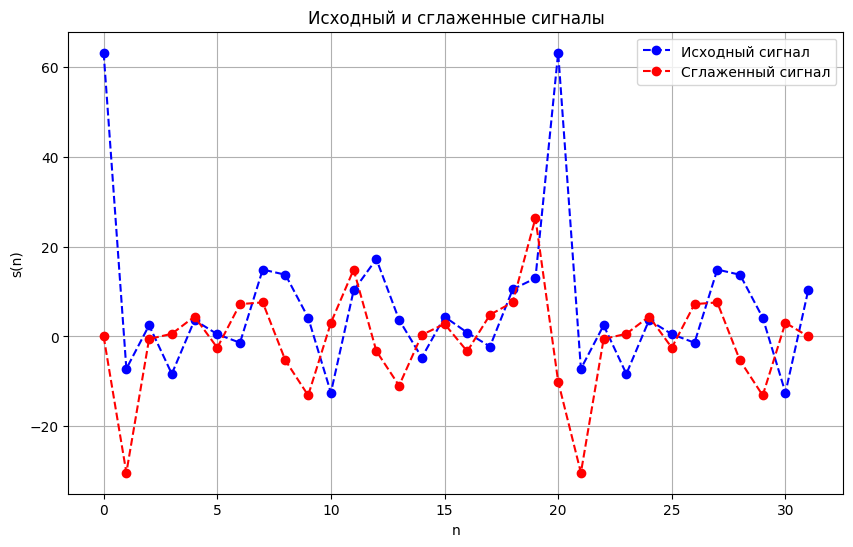

In [192]:
plt.plot(Xn, S, 'o--', color='blue', label='Исходный сигнал')
plt.plot(Xn, FD1(S), 'o--', color='red', label='Сглаженный сигнал')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.title("Исходный и сглаженные сигналы")
plt.legend()
plt.grid()
plt.show()

Построим график дискретных отсчетов спектра дискретретного сигнала после применениия сглаживания фильтром, который соответствует численному дифференцированию первого порядка:

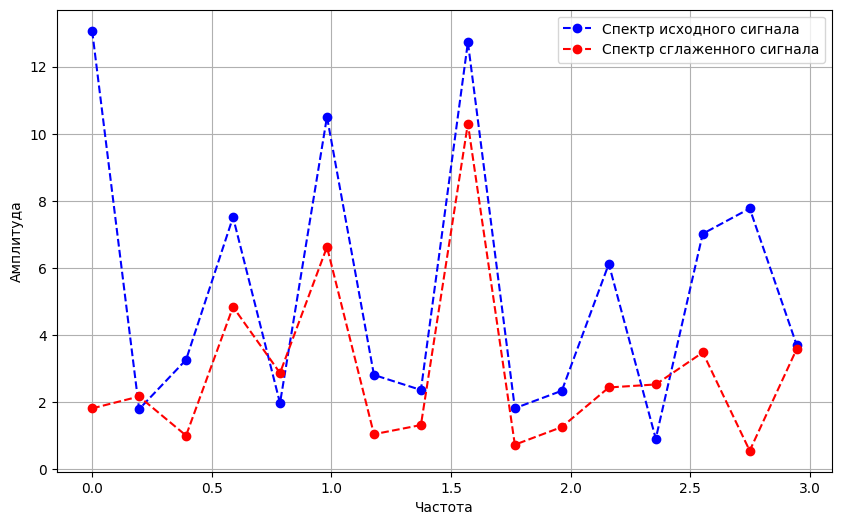

In [197]:
plt.plot(W, [abs(f) for f in F], 'o--', color='blue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in FFD1], 'o--', color='red', label='Спектр сглаженного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

Исходя из построенного графика, можно заключить, что фильтр, основанный на численном дифференцировании первого порядка, сильнее подавляет низкие и высокие частоты, средние подавляются меньше, что полностью соответствует передаточной функции этого фильтра.

#### Выполнение задания 8 п.2
Выполним задания 4-7 для дискретного фильтра, соответствующего численному интегрированию (формула прямоугольников, формула трапеций, формула Симпсона). 

Передаточная функция, соответствующая фильтру, основанному на формуле прямоугольников:
$$
H(\omega) = \frac{e^{\frac{i\omega}2}}{e^{i\omega - 1}} = \frac{1}{2i\sin\frac\omega 2}
$$

Передаточная функция, соответствующая фильтру, основанному на формуле трапеций:
$$
H(\omega) = \frac{e^{i\omega + 1}}{2\left(e^{i\omega} - 1\right)} = \frac{\cos\frac\omega 2}{2i\sin\frac\omega 2}
$$

Передаточная функция, соответствующая фильтру, основанному на формуле Симпсона:
$$
H(\omega) = \frac{e^{-i\omega + 4 + e^{i\omega}}}{3\left( e^{i\omega} - e^{-i\omega} \right)} = \frac{\cos\omega + 2}{3i\sin\omega}
$$


Вместе отобразим исходный и сглаженные сигналы:

In [194]:
def filters(S):
  squares, trap, simpson = [0], [0], [0]
  for i in range(1, len(S)):
    squares.append(squares[-1] + 0.5 *(S[i - 1] + S[i]))
    trap.append(trap[-1] + (S[i - 1] + S[i]) / (2 * T))

  for i in range(1, len(S) - 1):
    simpson.append(simpson[-1] + (S[i - 1] + 4 * S[i] + S[i + 1]) / 3)
  return squares, trap, simpson

FSq, FTr, FSi = filters(S)

FFSQ = np.fft.fft(FSq, norm='forward')[:N // 2] * 2
FFTR = np.fft.fft(FTr, norm='forward')[:N // 2] * 2
FFSI = np.fft.fft(FSi, norm='forward')[:N // 2] * 2

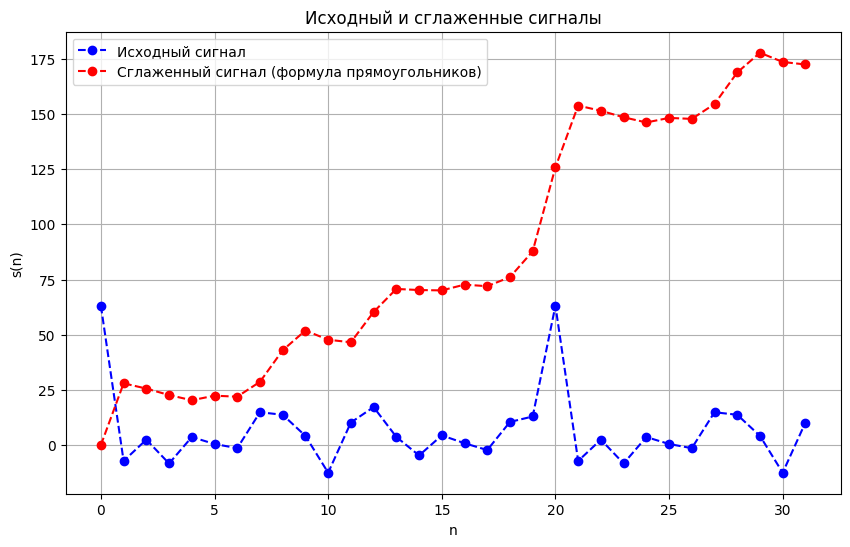

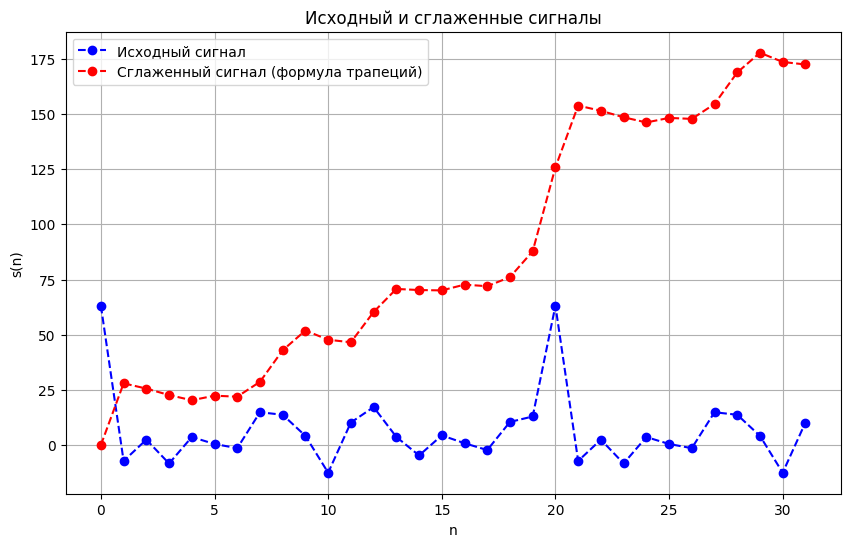

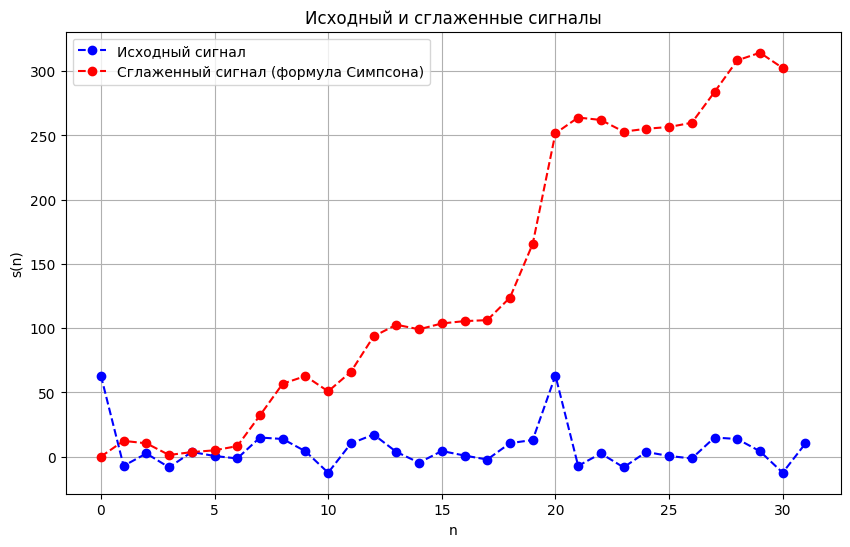

In [195]:
plt.plot(Xn, S, 'o--', color='blue', label='Исходный сигнал')
plt.plot(Xn, FSq, 'o--', color='red', label='Сглаженный сигнал (формула прямоугольников)')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.title("Исходный и сглаженные сигналы")
plt.legend()
plt.grid()

plt.show()

plt.plot(Xn, S, 'o--', color='blue', label='Исходный сигнал')
plt.plot(Xn, FSq, 'o--', color='red', label='Сглаженный сигнал (формула трапеций)')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.title("Исходный и сглаженные сигналы")
plt.legend()
plt.grid()
plt.show()


plt.plot(Xn, S, 'o--', color='blue', label='Исходный сигнал')
plt.plot(Xn[:-1], FSi, 'o--', color='red', label='Сглаженный сигнал (формула Симпсона)')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.title("Исходный и сглаженные сигналы")
plt.legend()
plt.grid()
plt.show()


Построим график дискретных отсчетов спектра дискретретного сигнала после применениия фильтров:

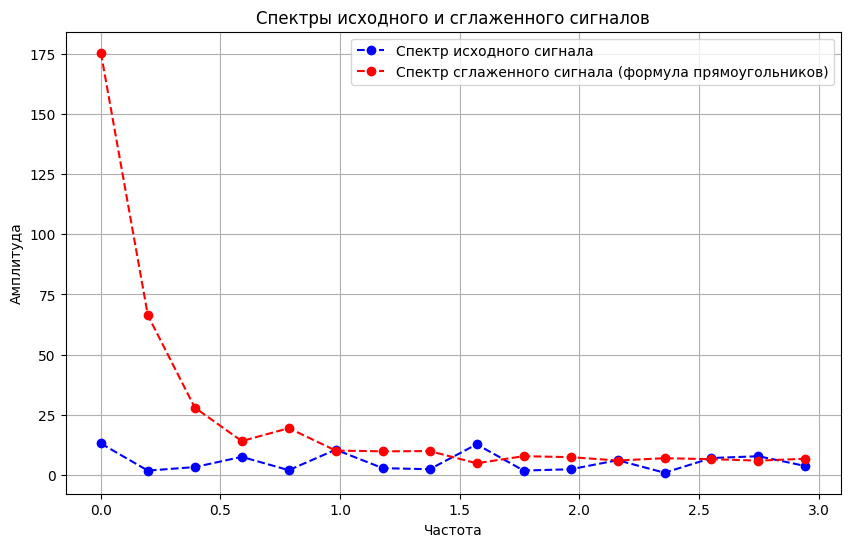

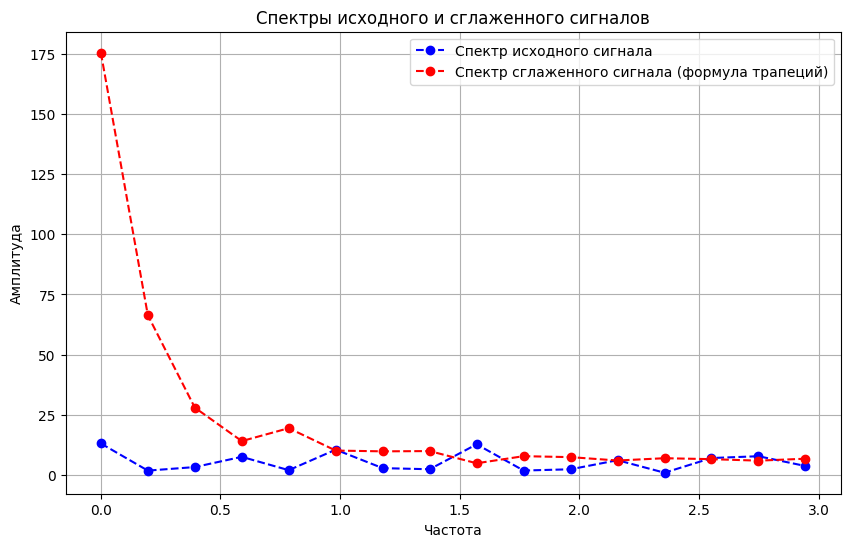

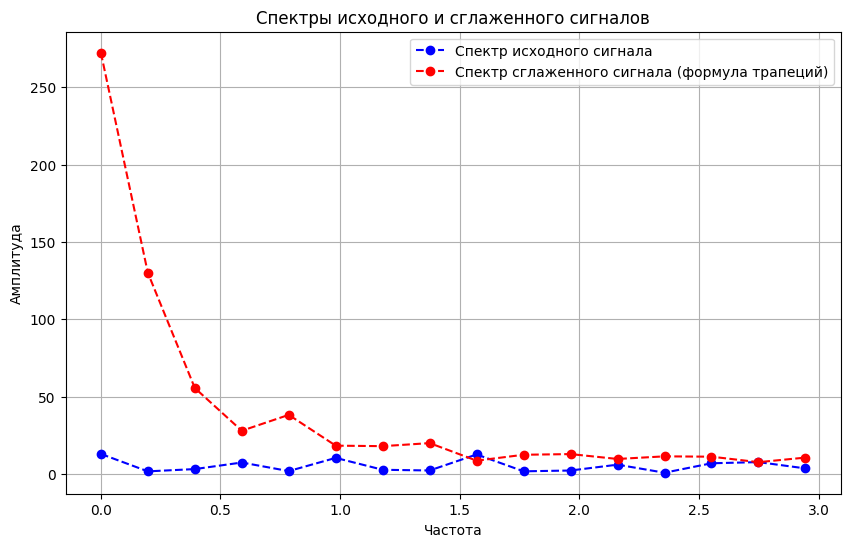

In [196]:
plt.plot(W, [abs(f) for f in F], 'o--', color='blue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in FFSQ], 'o--', color='red', label='Спектр сглаженного сигнала (формула прямоугольников)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.title('Спектры исходного и сглаженного сигналов')
plt.grid()
plt.legend()
plt.show()

plt.plot(W, [abs(f) for f in F], 'o--', color='blue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in FFTR], 'o--', color='red', label='Спектр сглаженного сигнала (формула трапеций)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.title('Спектры исходного и сглаженного сигналов')
plt.grid()
plt.legend()
plt.show()

plt.plot(W, [abs(f) for f in F], 'o--', color='blue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in FFSI], 'o--', color='red', label='Спектр сглаженного сигнала (формула трапеций)')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.title('Спектры исходного и сглаженного сигналов')
plt.grid()
plt.legend()
plt.show()


Исходя из полученных графиков, можно сделать вывод, что все фильтры усиливают низкие частоты, при этом высокие подавляются. Этот результат соответствует результату, который был получен при выполнении предыдущей практической работы.

## Выводы
В ходе выполнения практической работы был сформирован дискретный сигнал, путем дискретизации непрерывного сигнала, который представлял линейную комбинацию косинусоид с случайно сгенерированными коэффициентами. Для полученного сигнала было посчитано дискретное преобразование Фурье и получен дискретный спектр дискретного сигнала. Все результаты были отражены на графиках. 

Исходный сигнал был отфильтрован различными фильтрами: линейное сглаживание по пяти точкам, линейное сглаживание по девяти точкам, дифференциальный фильтр первого порядка, интегральные фильтры по формулам прямоугольников, трапеций, Симпсона. Для каждого сигнала, полученного после применения фильтра был построен дискретный спектр. Отфильтрованный сигнал и его спектр были отображены на графиках. 

Анализируя спектры, был получен следующий результат:
- фильтры, основанные на линейном сглаживании подавляют высокие частоты исходного сигнала, низкие частоты подавляются слабее
- фильтр, основанный на численном дифференцировании первого порядка сильнее подавляет высокие и низкие частоты, при этом средние подавляются слабее
- фильтры, основанные на формулах численного интегрирования подавляют высокие частоты, а низкие, наоборот, усиливают

Полученный результат соответствует ожидаемому (ожидаемый результат - поведение передаточных функций фильтров, которое было проанализировано при выполнении предыдущей работы).